In [44]:
# 必要なライブラリをimportします
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# 可視化のためのセットです。
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Pythonで日付と時刻を扱うためのモジュールです
from datetime import datetime

# Python2を使っている場合は必要です
from __future__ import division

In [19]:
# 所謂ハイテク企業の株価を扱ってみます。
tech_list = ['AAPL','GOOG','MSFT','AMZN']

# 直近1年間のデータを使ってみましょう。
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

# それぞれの企業ごとに、Yahooのサイトからデータを取得します
for stock in tech_list:   
    # それぞれの名前でDataFrameを作ります。
    import quandl
for stock in tech_list:
    globals()[stock] = quandl.get('WIKI/{}'.format(stock),start_date=start,end_date=end)

In [20]:
# データの概観を掴むことができます。
AAPL.describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,159.000000,159.000000,159.000000,159.000000,1.590000e+02,159.000000,159.0,159.000000,159.000000,159.000000,159.000000,1.590000e+02
mean,167.034182,168.351571,165.673812,167.017533,3.060851e+07,0.003962,1.0,167.026104,168.343359,165.665746,167.009371,3.060851e+07
std,8.164271,8.175080,8.207889,8.155087,1.213555e+07,0.049962,0.0,8.172651,8.182277,8.215105,8.161899,1.213555e+07
min,149.990000,151.830000,149.160000,150.550000,1.402652e+07,0.000000,1.0,149.990000,151.830000,149.160000,150.550000,1.402652e+07
25%,159.415000,160.725000,158.180000,159.770000,2.205397e+07,0.000000,1.0,159.415000,160.710000,158.055000,159.705000,2.205397e+07
50%,169.790000,170.560000,167.160000,169.080000,2.793972e+07,0.000000,1.0,169.790000,170.560000,167.160000,169.080000,2.793972e+07
75%,173.955000,175.085000,173.025000,174.270000,3.645800e+07,0.000000,1.0,173.955000,175.085000,173.025000,174.270000,3.645800e+07
max,182.590000,183.500000,180.210000,181.720000,8.543608e+07,0.630000,1.0,182.590000,183.500000,180.210000,181.720000,8.543608e+07


In [21]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 159 entries, 2017-08-08 to 2018-03-27
Data columns (total 12 columns):
Open           159 non-null float64
High           159 non-null float64
Low            159 non-null float64
Close          159 non-null float64
Volume         159 non-null float64
Ex-Dividend    159 non-null float64
Split Ratio    159 non-null float64
Adj. Open      159 non-null float64
Adj. High      159 non-null float64
Adj. Low       159 non-null float64
Adj. Close     159 non-null float64
Adj. Volume    159 non-null float64
dtypes: float64(12)
memory usage: 16.1 KB


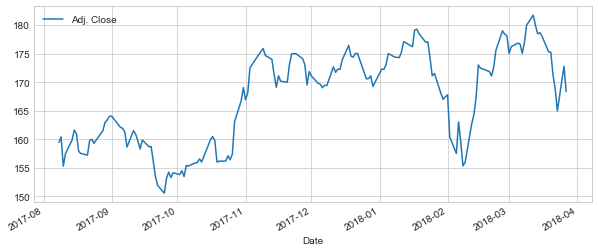

In [39]:
AAPL['Adj. Close'].plot(legend=True,figsize=(10,4))

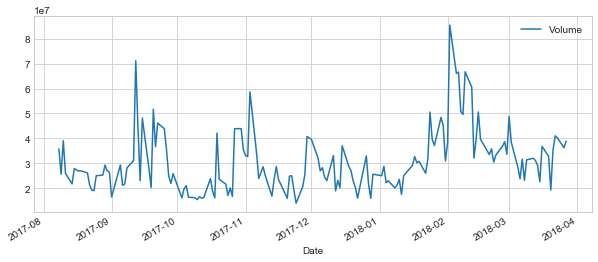

In [42]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [46]:
ma_day = [10,20,50]
for ma in ma_day:
    column_name = 'MA {}'.format(ma)
    AAPL[column_name] = AAPL['Adj. Close'].rolling(center=False,window=5).mean()

In [47]:
AAPL.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,MA 10,MA 20,MA 50
Date,,,,,,,,,,,,,,,
2017-08-08,158.60,161.8300,158.27,160.08,35775675.0,0.00,1.0,157.959089,161.176037,157.630423,159.433108,35775675.0,NaN,NaN,NaN
2017-08-09,159.26,161.2700,159.11,161.06,25640394.0,0.00,1.0,158.616422,160.618300,158.467028,160.409148,25640394.0,NaN,NaN,NaN
2017-08-10,159.90,160.0000,154.63,155.27,39081017.0,0.63,1.0,159.900000,160.000000,154.630000,155.270000,39081017.0,NaN,NaN,NaN
2017-08-11,156.60,158.5728,156.07,157.48,25943187.0,0.00,1.0,156.600000,158.572800,156.070000,157.480000,25943187.0,NaN,NaN,NaN
2017-08-14,159.32,160.2100,158.75,159.85,21754810.0,0.00,1.0,159.320000,160.210000,158.750000,159.850000,21754810.0,158.488451,158.488451,158.488451


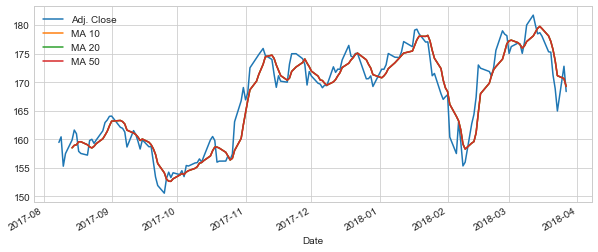

In [49]:
AAPL[['Adj. Close', 'MA 10','MA 20', 'MA 50']].plot(subplots=False, figsize=(10,4))

In [51]:
AAPL['Daily Return'] = AAPL['Adj. Close'].pct_change()

In [52]:
AAPL.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,MA 10,MA 20,MA 50,Daily Return
Date,,,,,,,,,,,,,,,,
2017-08-08,158.60,161.8300,158.27,160.08,35775675.0,0.00,1.0,157.959089,161.176037,157.630423,159.433108,35775675.0,NaN,NaN,NaN,NaN
2017-08-09,159.26,161.2700,159.11,161.06,25640394.0,0.00,1.0,158.616422,160.618300,158.467028,160.409148,25640394.0,NaN,NaN,NaN,0.006122
2017-08-10,159.90,160.0000,154.63,155.27,39081017.0,0.63,1.0,159.900000,160.000000,154.630000,155.270000,39081017.0,NaN,NaN,NaN,-0.032038
2017-08-11,156.60,158.5728,156.07,157.48,25943187.0,0.00,1.0,156.600000,158.572800,156.070000,157.480000,25943187.0,NaN,NaN,NaN,0.014233
2017-08-14,159.32,160.2100,158.75,159.85,21754810.0,0.00,1.0,159.320000,160.210000,158.750000,159.850000,21754810.0,158.488451,158.488451,158.488451,0.015050


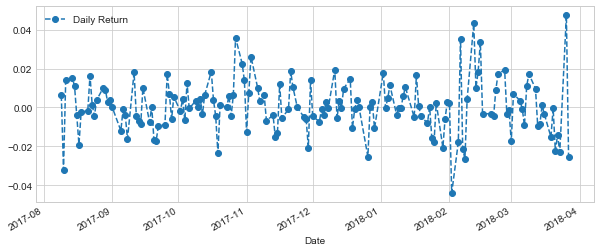

In [55]:
AAPL['Daily Return'].plot(figsize=(10,4), legend=True, linestyle='--', marker='o')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


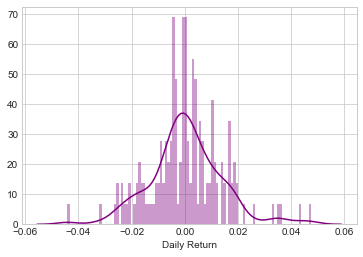

In [56]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

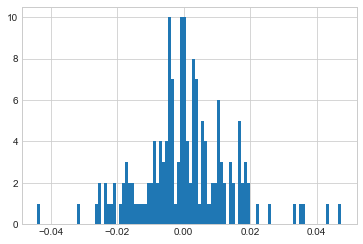

In [57]:
AAPL['Daily Return'].hist(bins=100)

In [66]:
closing_df=DataFrame(index=AAPL.index,columns=tech_list)
closing_df=closing_df.fillna(0)
closing_df.head()
for stock in tech_list:
    closing_df[stock] = quandl.get('WIKI/{}.11'.format(stock),start_date=start,end_date=end)

In [67]:
closing_df.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2017-08-08,159.433108,926.79,72.039718,989.84
2017-08-09,160.409148,922.90,71.723017,982.01
2017-08-10,155.270000,907.24,70.673943,956.92
2017-08-11,157.480000,914.39,71.752707,967.99
2017-08-14,159.850000,922.67,72.831472,983.30


In [68]:
tech_rets = closing_df.pct_change()

In [70]:
tech_rets.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2017-08-08,NaN,NaN,NaN,NaN
2017-08-09,0.006122,-0.004197,-0.004396,-0.007910
2017-08-10,-0.032038,-0.016968,-0.014627,-0.025550
2017-08-11,0.014233,0.007881,0.015264,0.011568
2017-08-14,0.015050,0.009055,0.015034,0.015816


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


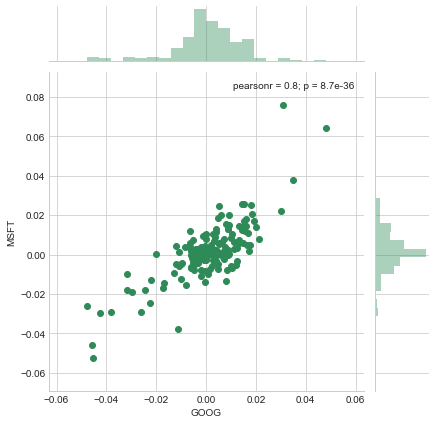

In [73]:
sns.jointplot('GOOG','MSFT',tech_rets, kind='scatter',color='seagreen')